# Import Library

In [21]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

## Import dan Baca Gambar

In [203]:
img = cv2.imread('Rama Dinantiar.jpg')  # Ganti nama file sesuai dengan gambar kamu
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

### Memisahkan Channel RGB

In [205]:
# === Pisahkan channel RGB ===
r = img_rgb[:, :, 0]
g = img_rgb[:, :, 1]
b = img_rgb[:, :, 2]

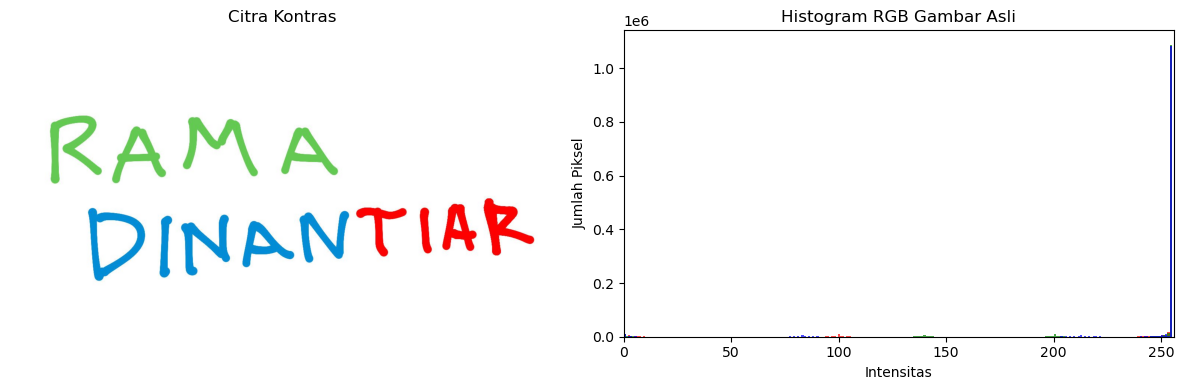

In [360]:
# Tampilkan hasil segmentasi dan histogram
plt.figure(figsize=(12, 4))

# === Kolom Kiri: Gambar Asli ===
plt.subplot(1, 2, 1)
plt.imshow(img_rgb)
plt.title("Citra Kontras")
plt.axis('off')

# === Kolom Kanan: Histogram RGB ===
plt.subplot(1, 2, 2)
colors = ('r', 'g', 'b')
channel_data = (r, g, b)
for col, data in zip(colors, channel_data):
    plt.hist(data.ravel(), bins=256, color=col, alpha=0.7, label=col.upper())

plt.title("Histogram RGB Gambar Asli")
plt.xlabel("Intensitas")
plt.ylabel("Jumlah Piksel")
plt.xlim([0, 256])

# Tampilkan
plt.tight_layout()
plt.show()

### Mendeteksi Gambar

In [363]:
hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

mendeteksiHijau = cv2.inRange(hsv, np.array([40, 40, 40]), np.array([80, 255, 255]))

mendeteksiBiru = cv2.inRange(hsv, np.array([100, 150, 0]), np.array([140, 255, 255]))

mendeeteksiMerah = cv2.bitwise_or(
    cv2.inRange(hsv, np.array([0, 120, 70]), np.array([10, 255, 255])),
    cv2.inRange(hsv, np.array([170, 120, 70]), np.array([180, 255, 255])))

## Mengolah Citra dengan Teknik Deteksi Warna dan Visualisasi Hasil

### BIRU

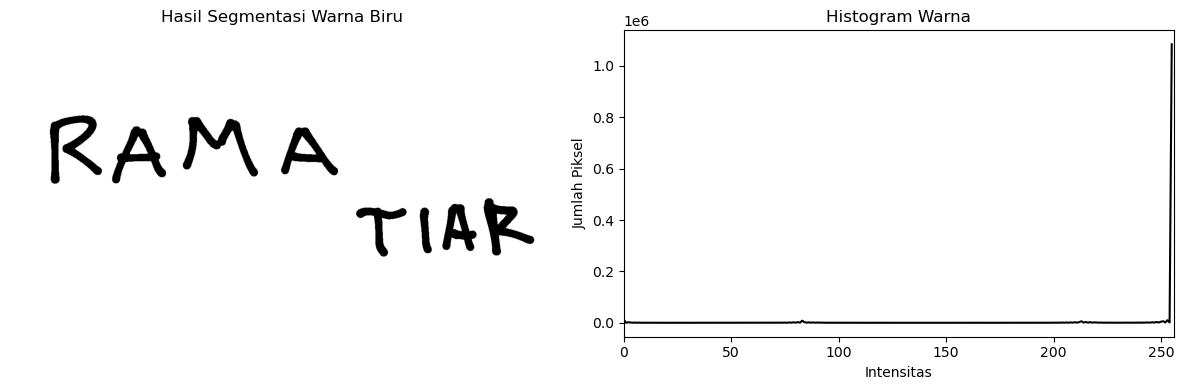

In [371]:


# Buat kanvas putih
output = np.ones_like(img) * 255

# Buat biru jadi putih (mask_biru: tulis putih)
output[mendeteksiBiru > 0] = [255, 255, 255]

# Buat hijau dan merah jadi hitam
mask_hijau_merah = cv2.bitwise_or(mendeteksiHijau, mendeteksiMerah)
output[mask_hijau_merah > 0] = [0, 0, 0]

# Hitung histogram
hist = cv2.calcHist([img], [0], None, [256], [0, 256])

# Tampilkan hasil segmentasi dan histogram
plt.figure(figsize=(12, 4))

# Gambar hasil segmentasi
plt.subplot(1, 2, 1)
plt.imshow(output)
plt.title('Hasil Segmentasi Warna Biru')
plt.axis('off')

# Gambar histogram
plt.subplot(1, 2, 2)
plt.plot(hist, color='black')
plt.title('Histogram Warna')
plt.xlabel('Intensitas')
plt.ylabel('Jumlah Piksel')
plt.xlim([0, 256])

plt.tight_layout()
plt.show()

### MERAH

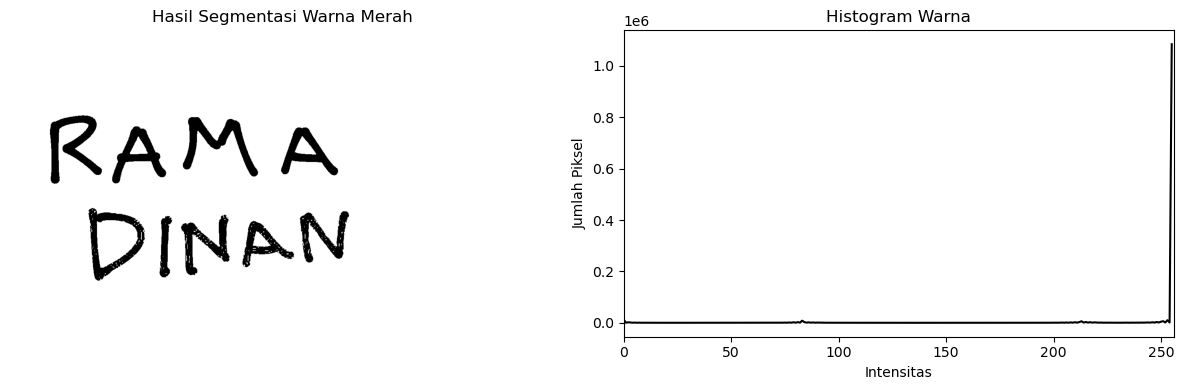

In [373]:
# Buat kanvas putih
output = np.ones_like(img) * 255

# Buat merah jadi putih (mask merah: tulis putih)
output[mendeteksiMerah > 0] = [255, 255, 255]

# Buat hijau dan biru jadi hitam
mask_hijau_biru = cv2.bitwise_or(mendeteksiHijau, mendeteksiBiru)
output[mask_hijau_biru > 0] = [0, 0, 0]

# Hitung histogram
hist = cv2.calcHist([img], [0], None, [256], [0, 256])

# Tampilkan hasil segmentasi dan histogram
plt.figure(figsize=(12, 4))

# Gambar hasil segmentasi
plt.subplot(1, 2, 1)
plt.imshow(output)
plt.title('Hasil Segmentasi Warna Merah')
plt.axis('off')

# Gambar histogram
plt.subplot(1, 2, 2)
plt.plot(hist, color='black')
plt.title('Histogram Warna')
plt.xlabel('Intensitas')
plt.ylabel('Jumlah Piksel')
plt.xlim([0, 256])

plt.tight_layout()
plt.show()

### HIJAU

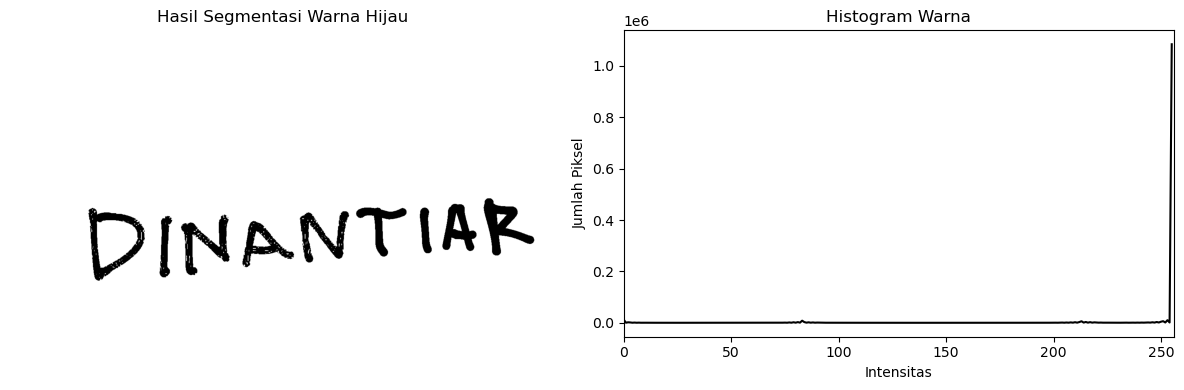

In [375]:
# Buat kanvas putih
output = np.ones_like(img) * 255

# Buat hijau jadi putih (mask biru: tulis putih)
output[mendeteksiBiru > 0] = [255, 255, 255]

# Buat biru dan merah jadi hitam
mask_biru_merah = cv2.bitwise_or(mendeteksiBiru, mendeteksiMerah)
output[mask_biru_merah > 0] = [0, 0, 0]

# Hitung histogram
hist = cv2.calcHist([img], [0], None, [256], [0, 256])

# Tampilkan hasil segmentasi dan histogram
plt.figure(figsize=(12, 4))

# Gambar hasil segmentasi
plt.subplot(1, 2, 1)
plt.imshow(output)
plt.title('Hasil Segmentasi Warna Hijau')
plt.axis('off')

# Gambar histogram
plt.subplot(1, 2, 2)
plt.plot(hist, color='black')
plt.title('Histogram Warna')
plt.xlabel('Intensitas')
plt.ylabel('Jumlah Piksel')
plt.xlim([0, 256])

plt.tight_layout()
plt.show()